# Pfam protein domain classification

In this notebook, I will use the Pfam dataset to classify protein domains. The dataset contains sequences of proteins and their respective Pfam labels. The Pfam database is a large collection of protein families, each represented by multiple sequence alignments and hidden Markov models (HMMs). Each family is typically defined by a curated seed alignment and a profile HMM. The database also contains additional information such as multiple sequence alignments, consensus sequences, and annotation.

The dataset is available at https://www.kaggle.com/googleai/pfam-seed-random-split

The dataset contains the following columns:

- `sequence`: The protein sequence. The protein sequences are typically 50-1000 amino acids long. The first 10-20 amino acids are a signal peptide that can be ignored during model training. The remaining sequence is the mature protein. The protein sequence is represented as a string. The alphabet for the protein sequence is 20 amino acids (e.g., A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y).
- `family_accession`: The Pfam family accession. This is a unique identifier of a Pfam family. For example, the Pfam family accession of the "7tm_1" family is "PF00001". The family accessions starting with "PF" followed by five digits are curated Pfam families, and the rest are automatically generated Pfam families. The manually curated Pfam families are a gold standard, but there are also high-quality automatically generated Pfam families.
- `sequence_name`: The name of the sequence. It is not guaranteed to be unique. In fact, multiple sequences may share the same sequence name. This is because the same sequence may belong to multiple Pfam families. The sequence name is mainly for human inspection and can be ignored during model training. The same sequence name does not imply the same protein sequence. The protein sequences are unique and different.
- `aligned_sequence`: The aligned protein sequence. It is derived from the HMM-HMM alignment between the protein sequence and the Pfam family HMM. It is a string with "-" to denote insertions relative to the HMM. The first 10-20 amino acids are a signal peptide that can be ignored during model training. The remaining sequence is the mature protein. The length of the aligned sequence is typically similar to the length of the protein sequence. The aligned sequence is informative for training models that rely on multiple sequence alignments.
- `family_id`: The Pfam family ID. It is similar to the `family_accession` but provides a different naming convention. It is also a unique identifier of a Pfam family. The family IDs starting with "CL" followed by seven digits are curated Pfam families, and the rest are automatically generated Pfam families. The manually curated Pfam families are a gold standard, but there are also high-quality automatically generated Pfam families.

The task is to predict the `family_accession` of a protein sequence.

In [1]:
import pandas as pd
import os    
import matplotlib.pyplot as plt

In [2]:
DIR_PATH='data/'

In [3]:
def read_data(sub_dir, path=DIR_PATH):
    data = []
    for file in os.listdir(path + sub_dir):
        data.append(pd.read_csv(path + sub_dir + file))
    return pd.concat(data)

df_train = read_data('train/')
df_test = read_data('test/')
df_val = read_data('dev/')

In [4]:
df_train.head(10)

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,Penicillinase_R,Q81U16_BACAN/8-123,PF03965.16,ISEAELEIMKVLWLKSP.QTANEIIEE.LEDP.MDW..KPKTIRTL...,ISEAELEIMKVLWLKSPQTANEIIEELEDPMDWKPKTIRTLINRLV...
1,Rtt106,POB3_CANAL/362-454,PF08512.12,AGVPCSVKA...SEGYLFPL......DRCFLF.VTKPTLYIPYSE....,AGVPCSVKASEGYLFPLDRCFLFVTKPTLYIPYSEISSVVMSRTGG...
2,F-actin_cap_A,Q8I3I2_PLAF7/12-301,PF01267.17,IRHVLMNSPPGKLYDLVK..DINILL.G.........SSVSIQ.KI...,IRHVLMNSPPGKLYDLVKDINILLGSSVSIQKILEEVLKDYNEKNY...
3,HupF_HypC,O28902_ARCFU/1-65,PF01455.18,MCIAIPGR...I.ER..IDY...............P....IAIVDF...,MCIAIPGRIERIDYPIAIVDFKGLKKEVRIDLLENPQIGDYVLVHV...
4,DUF3794,R6BY75_9CLOT/189-271,PF12673.7,NIFHI..LWEDVDL..E.GVTFKPMG...E...........S.......,NIFHILWEDVDLEGVTFKPMGESISVQGDIHIFVLYEGEGENTPIR...
5,MLTR_LBD,H6NFE3_9BACL/62-229,PF17765.1,VSPILQSLLDQLE..TTPAYILDQRMNIVGWNEAFSDVYGD........,VSPILQSLLDQLETTPAYILDQRMNIVGWNEAFSDVYGDYLYKGER...
6,DUF4217,T1EJ05_HELRO/391-451,PF13959.6,ITRNAESLCASDVTLKQFAQRAFVSYLK............SVGMNK...,ITRNAESLCASDVTLKQFAQRAFVSYLKSVGMNKNKDIFSVKLIDY...
7,zf-A20,U5GUS6_POPTR/60-82,PF01754.16,KLCANS.CGFFGTATTMNLCSKCH.,KLCANSCGFFGTATTMNLCSKCH
8,Trigger_N,F2I568_AERUA/1-145,PF05697.13,MSVKFEETAT...N.EGVLHFTVSKEDAQKA....LKQAYNRVKG....,MSVKFEETATNEGVLHFTVSKEDAQKALKQAYNRVKGKVNIPGFRK...
9,YccF,R5FJ20_9BACT/70-119,PF03733.13,.LNVLWIIM.GGLWAWFMHIIFGVLLF...ITII..........GI...,LNVLWIIMGGLWAWFMHIIFGVLLFITIIGIPFGRQHFKMARLSLA...


In [5]:
print("Train:", df_train.shape)
print("Test:", df_test.shape)
print("Validation:",df_val.shape)

Train: (1086741, 5)
Test: (126171, 5)
Validation: (126171, 5)


In [6]:
def slpit_pourcentage(df_train, df_test, df_val):
    total = df_train.shape[0] + df_test.shape[0] + df_val.shape[0]
    print("Train:", (df_train.shape[0]/total)*100)
    print("Test:", (df_test.shape[0]/total)*100)
    print("Validation:", (df_val.shape[0]/total)*100)

slpit_pourcentage(df_train, df_test, df_val)

Train: 81.15561171338894
Test: 9.42219414330553
Validation: 9.42219414330553


In [7]:
def unique_values(df):
    print('---------------------------')
    print("family_accession", df['family_accession'].nunique())
    print("family_id", df['family_id'].nunique())

unique_values(df_train)
unique_values(df_test)
unique_values(df_val)

---------------------------
family_accession 17929
family_id 17929
---------------------------
family_accession 13071
family_id 13071
---------------------------
family_accession 13071
family_id 13071


In [8]:
def is_family_id_test_in_train(df_train, df_test, df_val):
    print("family_id in test not in train:", len(set(df_test['family_id'].unique()) - set(df_train['family_id'].unique())))
    print("family_id in val not in train:", len(set(df_test['family_id'].unique()) - set(df_train['family_id'].unique())))
    print("family_id in val not in test:", len(set(df_val['family_id'].unique()) - set(df_test['family_id'].unique())))

    print("family_accession in test not in train:", len(set(df_test['family_accession'].unique()) - set(df_train['family_accession'].unique())))
    print("family_accession in val not in train:", len(set(df_test['family_accession'].unique()) - set(df_train['family_accession'].unique())))
    print("family_accession in val not in test:", len(set(df_val['family_accession'].unique()) - set(df_test['family_accession'].unique())))

is_family_id_test_in_train(df_train, df_test, df_val)


family_id in test not in train: 0
family_id in val not in train: 0
family_id in val not in test: 0
family_accession in test not in train: 0
family_accession in val not in train: 0
family_accession in val not in test: 0


In [9]:
assert df_train.groupby('family_id')['family_accession'].nunique().max() == 1
print("All good!")

assert df_train.groupby('family_accession')['family_id'].nunique().max() == 1
print("All good!")

All good!
All good!


In [10]:
def get_info_sequence(df):
    print("Max sequence length:", df['sequence'].apply(len).max())
    print("Min length sequence:", df['sequence'].apply(len).min())
    print("Mean length sequence:", df['sequence'].apply(len).mean())

get_info_sequence(df_train)

Max sequence length: 2037
Min length sequence: 4
Mean length sequence: 155.37997094063812


In [11]:
def get_alphabet(df):
    alphabet = set()
    for seq in df['sequence']:
        alphabet.update(set(seq))
    
    return alphabet

print("Alphabet:",get_alphabet(df_train))

Alphabet: {'H', 'D', 'T', 'I', 'C', 'B', 'N', 'G', 'F', 'E', 'L', 'O', 'A', 'S', 'M', 'P', 'V', 'R', 'K', 'Q', 'W', 'Z', 'U', 'Y', 'X'}


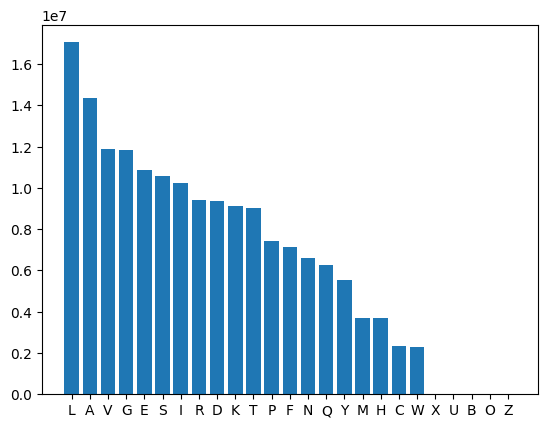

In [12]:
def occurence_alphabet(df):
    alphabet = {}
    for seq in df['sequence']:
        for char in seq:
            if char in alphabet:
                alphabet[char] += 1
            else:
                alphabet[char] = 1
    return alphabet

def plot_occurence_alphabet(df):
    alphabet = occurence_alphabet(df)
    alphabet = {k: v for k, v in sorted(alphabet.items(), key=lambda item: item[1], reverse=True)}
    plt.bar(alphabet.keys(), alphabet.values())
    plt.show()

plot_occurence_alphabet(df_train)

In [13]:
alphabet_drop = {'X', 'U', 'B', 'Z', 'O', 'J'}
def drop_alphabet(df, alphabet_drop):
    for char in alphabet_drop:
        df = df[~df['sequence'].str.contains(char)]
    return df

df_train = drop_alphabet(df_train, alphabet_drop)
df_test = drop_alphabet(df_test, alphabet_drop)
df_val = drop_alphabet(df_val, alphabet_drop)

print("Alphabet:",get_alphabet(df_train))

Alphabet: {'H', 'D', 'T', 'I', 'C', 'N', 'G', 'F', 'E', 'L', 'A', 'S', 'M', 'P', 'V', 'R', 'K', 'Q', 'W', 'Y'}


In [14]:
df_train['sequence'].apply(len).mean()

np.float64(155.3424001075563)